In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [121]:
class perceptron:
    def __init__(self):
        self.W=np.random.rand(1,1)
        self.b=np.random.rand(1,1)
        self.lr=0.00001
        self.loss=[]
        self.all_w=[]
        
    def fit(self,x_train,y_train):
        for i in range(len(x_train)):
            y_pred = np.matmul(x_train[i], self.W) + self.b
            e = y_train[i] - y_pred
            self.W = self.W + e * self.lr * x_train[i]
            self.b = self.b + e * self.lr
            Y_pred = np.matmul(x_train, self.W)
            error = np.mean(np.abs(y_train - Y_pred))
            self.loss.append(error)
            self.all_w.append(self.W)
        return self.loss
    
    def predict(self,x):
        x=np.array(x)
        x=x.reshape(1,1)
        return np.matmul(x, self.W) + self.b

    def evaluation(self,X,Y):
        substract=np.abs(Y-np.matmul(X,self.W)+self.b)
        return np.mean(substract)

In [122]:
data_weather=pd.read_csv('weatherHistory.csv')
data_weather.head

<bound method NDFrame.head of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1  

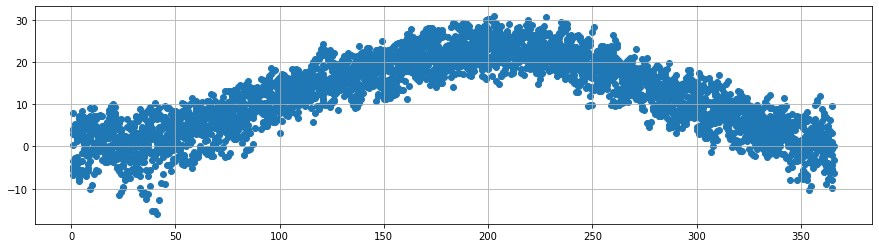

In [123]:
data_weather['Formatted Date'] = pd.to_datetime(data_weather['Formatted Date'], utc=True)
data_weather['day_of_year'] = data_weather['Formatted Date'].dt.dayofyear
weather = data_weather.set_index('Formatted Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
day_w = weather[['Temperature (C)', 'day_of_year']].copy()
day_w.groupby('day_of_year')
X_train, X_test, Y_train, Y_test = train_test_split(day_w['day_of_year'],
                                                    day_w['Temperature (C)'], test_size=0.1)
plt.figure(figsize=(15,4)) 
plt.scatter(day_w['day_of_year'],day_w['Temperature (C)'], marker='o')
plt.grid()

In [124]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

temperature on the 28th day of the year: [3.58442607]


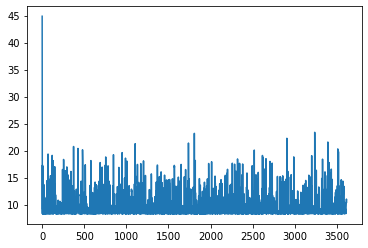

In [129]:
model=perceptron()
loss=model.fit(X_train,Y_train)
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(loss)
model.evaluation(X_test, Y_test)
day =28
t = model.predict(day)
t = t.reshape(1)
print(f'temperature on the {day}th day of the year: {t}')